<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/Case_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA KELOMPOK </br>
- Alexander Agung Raya
- Muhammad Afif Al Ghifari
- fajrul santoso


Bagian A – Observasi & Eksperimen

1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

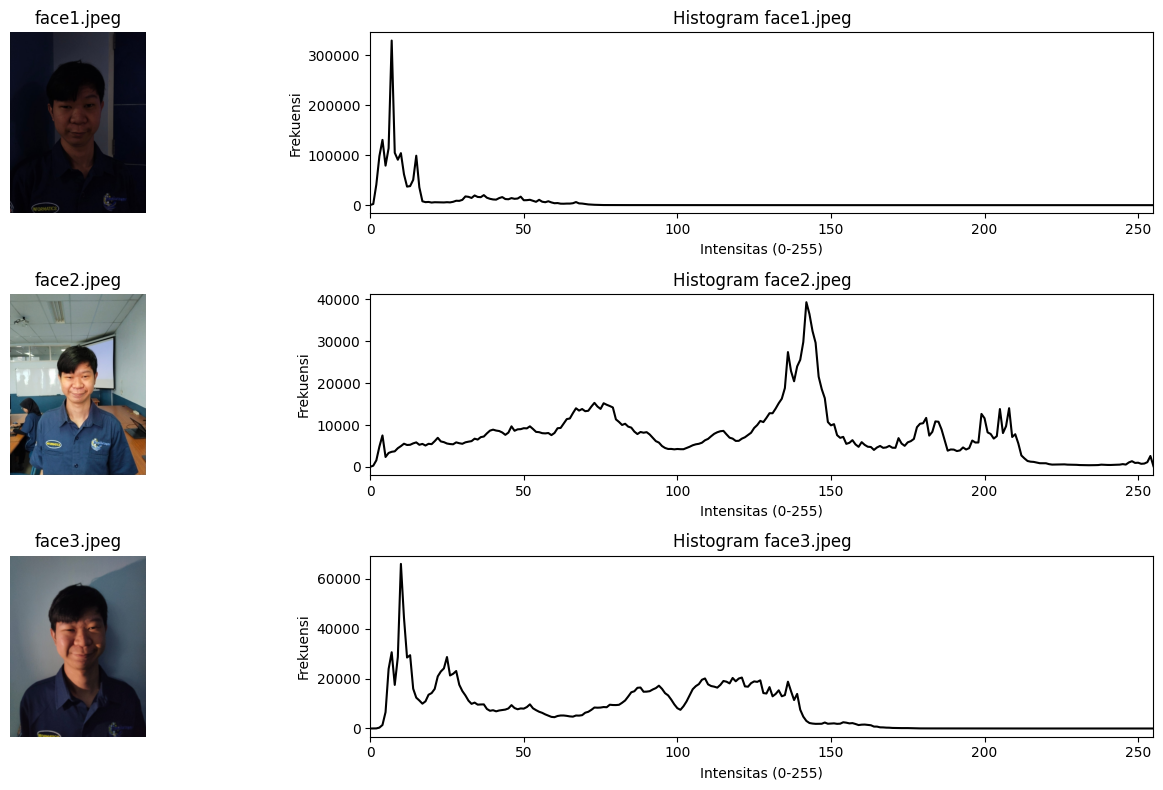

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

images = [
    '/content/face1.jpeg',
    '/content/face2.jpeg',
    '/content/face3.jpeg'
]

plt.figure(figsize=(15, 8))

for i, path in enumerate(images, 1):

    img = cv.imread(path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    hist = cv.calcHist([gray], [0], None, [256], [0, 256])

    title = os.path.basename(path)

    plt.subplot(3, 2, 2*i - 1)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

    plt.subplot(3, 2, 2*i)
    plt.plot(hist, color='black')
    plt.title(f"Histogram {title}")
    plt.xlabel("Intensitas (0-255)")
    plt.ylabel("Frekuensi")
    plt.xlim([0, 255])

plt.tight_layout()
plt.show()


Terapkan transformasi brightness dan contrast (linear/log brightness).
- Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural.

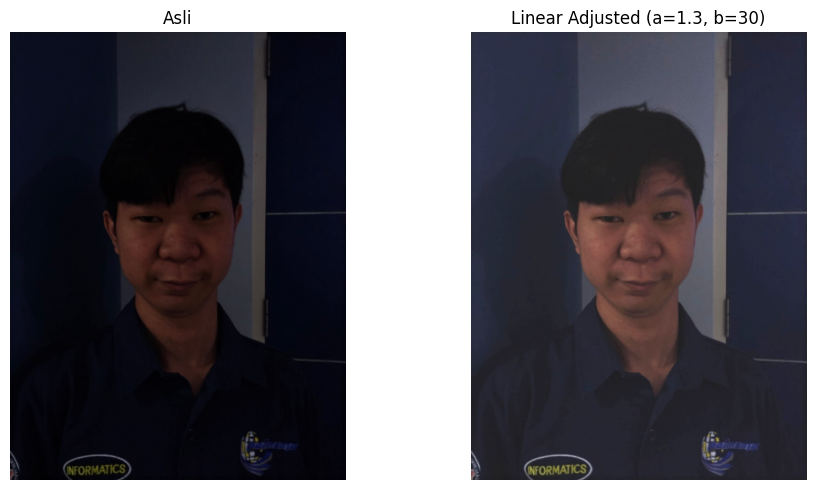

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/face1.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

a = 1.3
b = 30

linear_adjusted = cv.convertScaleAbs(img_rgb, alpha=a, beta=b)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(linear_adjusted)
plt.title(f"Linear Adjusted (a={a}, b={b})")
plt.axis("off")

plt.tight_layout()
plt.show()


Lakukan histogram equalization untuk memperbaiki sebaran kontras.
o Bandingkan hasil visual dan histogram sebelum–sesudah.

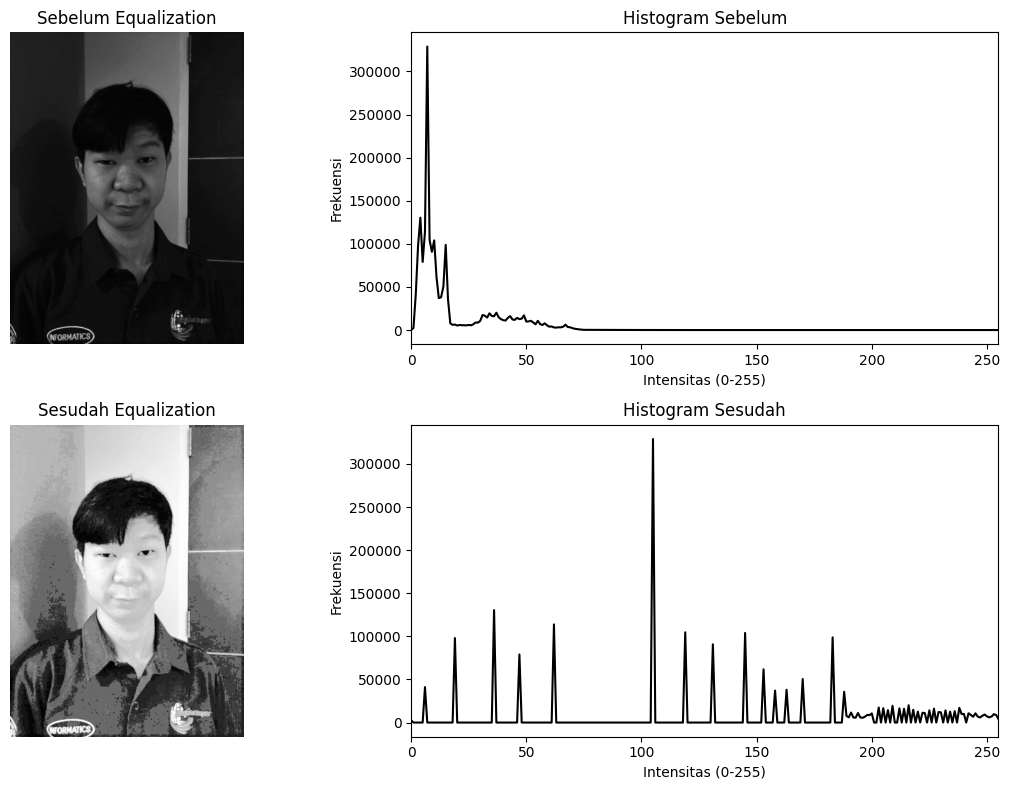

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/face1.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

hist_before = cv.calcHist([gray], [0], None, [256], [0, 256])

equalized = cv.equalizeHist(gray)

hist_after = cv.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Sebelum Equalization")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_before, color='black')
plt.title("Histogram Sebelum")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Frekuensi")
plt.xlim([0, 255])

plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title("Sesudah Equalization")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_after, color='black')
plt.title("Histogram Sesudah")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Frekuensi")
plt.xlim([0, 255])

plt.tight_layout()
plt.show()


Terapkan filter spasial:
- Low-pass filter untuk menghaluskan noise kulit wajah.
- High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.

Low-Pass

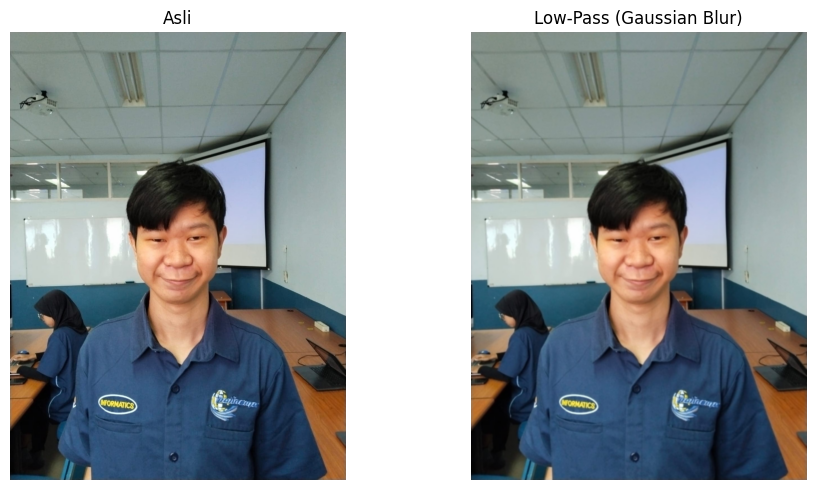

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/face2.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

low_pass = cv.GaussianBlur(img_rgb, (7, 7), 1.5)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(low_pass)
plt.title("Low-Pass (Gaussian Blur)")
plt.axis('off')

plt.tight_layout()
plt.show()


High-Pass

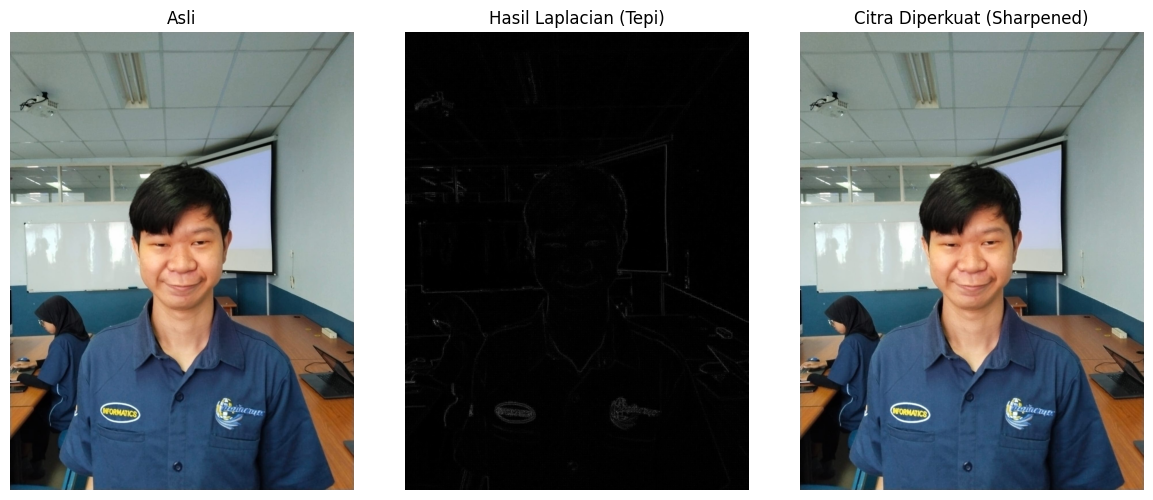

In [ ]:

gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

laplacian = cv.Laplacian(gray, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian)

sharpened = cv.addWeighted(img_rgb, 1.0, cv.cvtColor(laplacian, cv.COLOR_GRAY2RGB), 0.5, 0)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Asli")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(laplacian, cmap='gray')
plt.title("Hasil Laplacian (Tepi)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sharpened)
plt.title("Citra Diperkuat (Sharpened)")
plt.axis('off')

plt.tight_layout()
plt.show()


Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna
wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi
wajah.

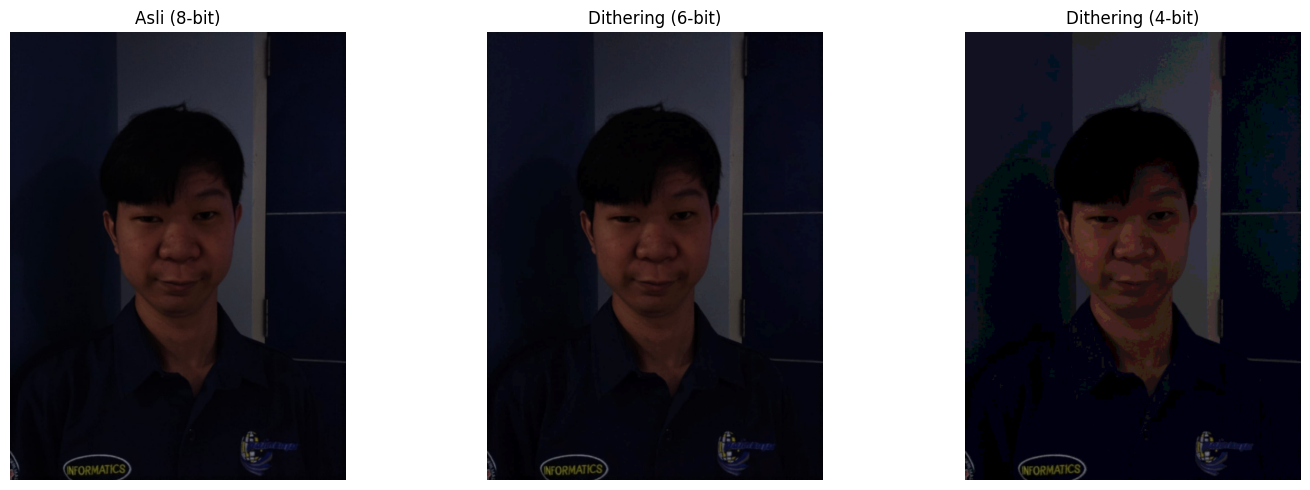

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def floyd_steinberg_dither(img, bit_depth=4):

    img = img.astype(np.float32) / 255.0


    levels = 2 ** bit_depth
    step = 1.0 / (levels - 1)

    h, w, c = img.shape
    output = img.copy()

    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = output[y, x]
            new_pixel = np.round(old_pixel / step) * step
            output[y, x] = new_pixel


            quant_error = old_pixel - new_pixel


            output[y, x + 1] += quant_error * 7 / 16
            output[y + 1, x - 1] += quant_error * 3 / 16
            output[y + 1, x]     += quant_error * 5 / 16
            output[y + 1, x + 1] += quant_error * 1 / 16


    output = np.clip(output, 0, 1)
    output = (output * 255).astype(np.uint8)
    return output


img = cv.imread('/content/face1.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


dithered_4bit = floyd_steinberg_dither(img_rgb, bit_depth=4)
dithered_6bit = floyd_steinberg_dither(img_rgb, bit_depth=6)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Asli (8-bit)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(dithered_6bit)
plt.title("Dithering (6-bit)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dithered_4bit)
plt.title("Dithering (4-bit)")
plt.axis("off")

plt.tight_layout()
plt.show()


Bagian B – Analisis

1 Bagaimana perubahan nilai brightness dan contrast memengaruhi hasil histogram wajah
gelap?


---

  Saat brightness ditingkatkan, seluruh piksel menjadi lebih terang sehingga histogram bergeser ke kanan. Sebaliknya, saat brightness diturunkan, piksel lebih gelap dan histogram bergeser ke kiri. Kontras tinggi membuat sebaran piksel lebih lebar, menonjolkan perbedaan antara area terang dan gelap, sehingga kontur wajah terlihat lebih jelas. Kontras rendah membuat histogram menumpuk di tengah, menghasilkan wajah tampak datar dan kurang detail


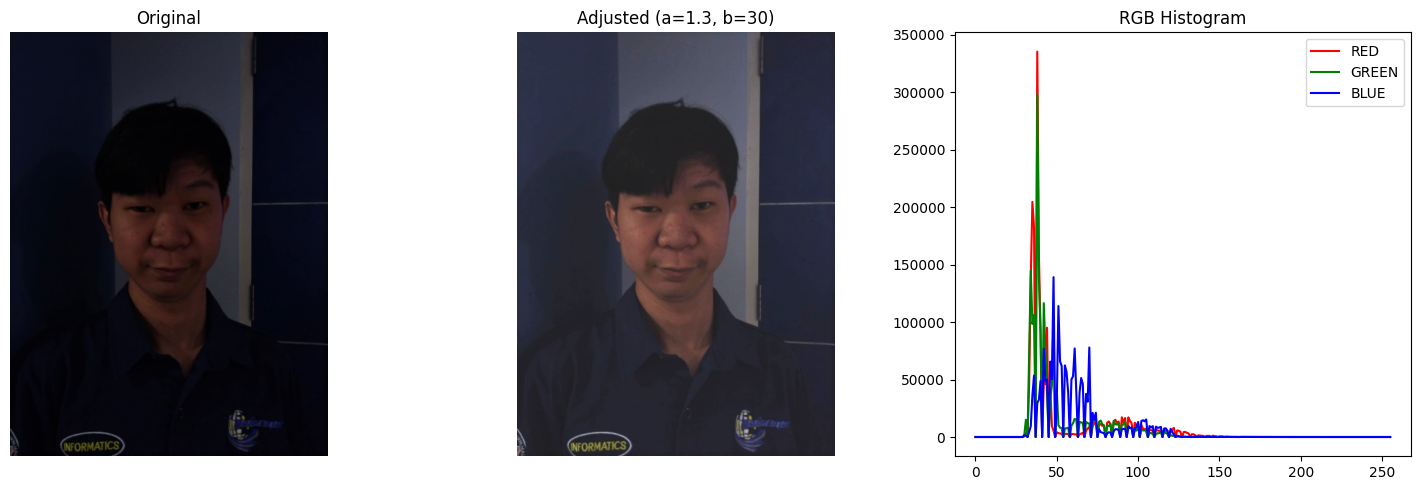

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load gambar berwarna
img = cv2.imread('/content/face1.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameter optimal
a, b = 1.3, 30
adjusted = cv2.convertScaleAbs(img_rgb, alpha=a, beta=b)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli berwarna
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

# Gambar hasil adjust berwarna
plt.subplot(1, 3, 2)
plt.imshow(adjusted)
plt.title(f"Adjusted (a={a}, b={b})")
plt.axis('off')

# Histogram warna
plt.subplot(1, 3, 3)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    hist = cv2.calcHist([adjusted], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=color.upper())
plt.legend()
plt.title("RGB Histogram")

plt.tight_layout()
plt.show()

2. Apakah histogram equalization selalu memperbaiki detail wajah? Jelaskan alasannya dengan
contoh hasil Anda.

---
Tidak selalu. Histogram equalization memperluas distribusi intensitas sehingga area gelap menjadi lebih terang dan detail tersembunyi bisa muncul, misalnya kontur mata atau pipi. Namun, pada citra dengan pencahayaan tidak merata, teknik ini dapat menonjolkan noise dan membuat tekstur kulit terlihat kasar atau tidak natural. Contohnya, area pipi gelap jadi terlalu kontras sementara bagian dahi atau hidung bisa terlalu terang.

/tmp/ipython-input-2312152109.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256], alpha=0.7, label='Sebelum', color='gray')
/tmp/ipython-input-2312152109.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256], alpha=0.7, label='Sesudah', color='blue')


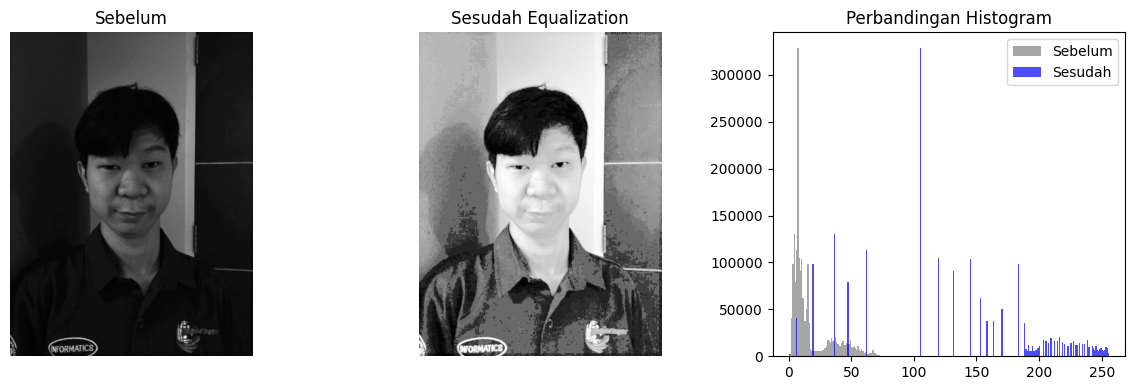

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load gambar sebagai grayscale
img = cv2.imread('/content/face1.jpeg', 0)

# Apply histogram equalization
equalized = cv2.equalizeHist(img)

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Sebelum")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Sesudah Equalization")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(img.ravel(), 256, [0, 256], alpha=0.7, label='Sebelum', color='gray')
plt.hist(equalized.ravel(), 256, [0, 256], alpha=0.7, label='Sesudah', color='blue')
plt.legend()
plt.title("Perbandingan Histogram")

plt.tight_layout()
plt.show()

3. Bandingkan hasil low-pass dan high-pass filter pada area wajah — bagian mana yang paling
terpengaruh?

---
Low-pass filter (blur) menghaluskan citra dengan mengurangi detail halus, terutama pada rambut, pori kulit, dan bayangan wajah. High-pass filter menajamkan kontur wajah seperti garis mata, hidung, dan bibir sehingga fitur wajah lebih terlihat, tetapi bisa menambah noise pada area kulit datar. Dengan kata lain, low-pass melembutkan sedangkan high-pass menonjolkan tepi dan fitur penting.



---



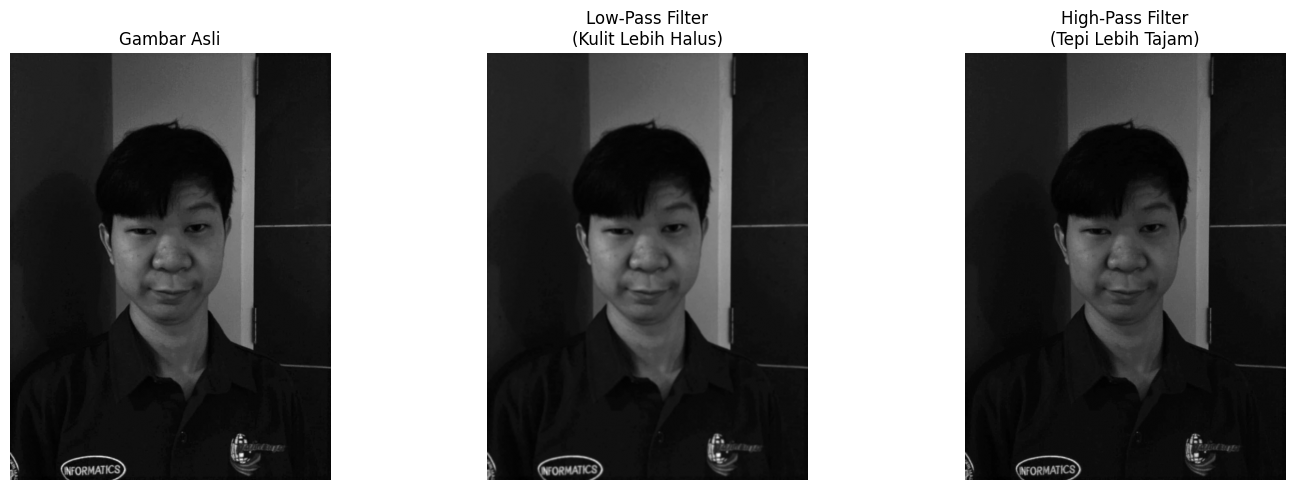

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar grayscale
img = cv2.imread('/content/face1.jpeg', 0)

# 1. Low-pass filter (Gaussian Blur) untuk menghaluskan kulit
low_pass = cv2.GaussianBlur(img, (9, 9), 2.0)

# 2. High-pass filter untuk menajamkan tepi
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
sharpened = cv2.addWeighted(img, 1.2, laplacian, 0.5, 0)

# Tampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(low_pass, cmap='gray')
plt.title("Low-Pass Filter\n(Kulit Lebih Halus)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("High-Pass Filter\n(Tepi Lebih Tajam)")
plt.axis('off')

plt.tight_layout()
plt.show()


Filter Type	Area Paling Terpengaruh	Efek	Kelemahan
*   Low-Pass	Kulit wajah	Menghaluskan tekstur	Kehilangan detail halus
*   High-Pass	Mata, bibir, kontur	Menajamkan tepi	Amplifikasi noise




4. Mengapa proses dithering bisa mempertegas atau justru mengaburkan ekspresi wajah?

---

Dithering mengurangi level warna menjadi hitam-putih atau level rendah sehingga citra menjadi pola piksel kontras tinggi. Jika kontras area wajah cukup besar, ekspresi bisa terlihat lebih tegas, misalnya garis senyum atau mata. Namun, jika banyak gradasi abu-abu, detail halus hilang dan ekspresi wajah justru tampak datar atau kabur.

5. Berdasarkan hasil percobaan Anda, kombinasi teknik mana yang paling efektif untuk
meningkatkan readability fitur wajah sebelum tahap deteksi?

---
Kombinasi histogram equalization dan high-pass filter paling efektif. Equalization meningkatkan distribusi intensitas sehingga area gelap terlihat jelas, sementara high-pass menajamkan kontur wajah sehingga fitur seperti mata, hidung, dan bibir lebih mudah dikenali. Kombinasi ini membuat citra lebih natural sekaligus siap untuk tahap deteksi wajah atau face recognition.


Bagian C – Implementasi (Python–OpenCV)

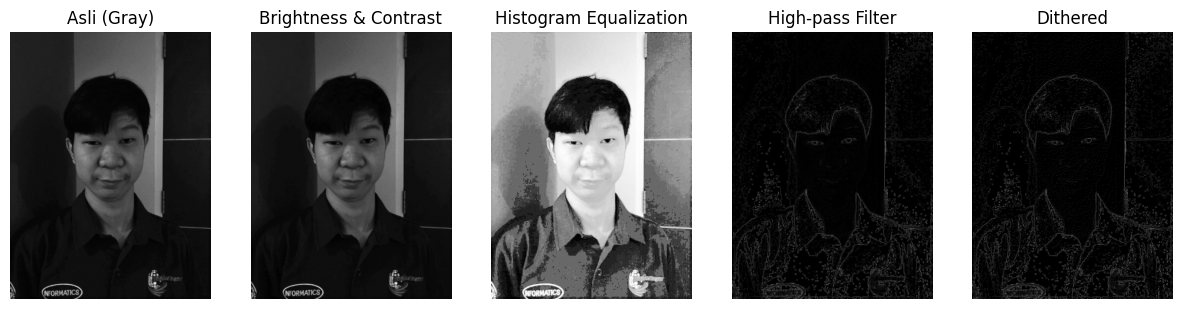

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/face1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Brightness & Contrast
b, a = 30, 1.2
img_bc = cv2.convertScaleAbs(gray, alpha=a, beta=b)

# Histogram Equalization
img_he = cv2.equalizeHist(img_bc)

# Spatial Filtering (High-pass)
kernel_hp = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])
img_hp = cv2.filter2D(img_he, -1, kernel_hp)

# Dithering (Floyd-Steinberg)
img_dither = img_hp.copy().astype(np.float32)
h, w = img_dither.shape

for y in range(h-1):
    for x in range(1, w-1):
        old = img_dither[y, x]
        new = 0 if old < 128 else 255
        img_dither[y, x] = new
        err = old - new
        # Distribusi error Floyd-Steinberg
        img_dither[y, x+1] += err * 7/16
        img_dither[y+1, x-1] += err * 3/16
        img_dither[y+1, x]   += err * 5/16
        img_dither[y+1, x+1] += err * 1/16

img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)

# Tampilkan hasil
titles = ["Asli (Gray)", "Brightness & Contrast",
          "Histogram Equalization", "High-pass Filter", "Dithered"]

images = [gray, img_bc, img_he, img_hp, img_dither]

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()

Bagian D – Analisis Akhir & Kesimpulan


- Urutan proses terbaik untuk menghasilkan wajah paling siap recognition<br>
  Jawab:
    1. Grayscale
    2. Brightness dan Contrast
    3. Histogram Equalization
    4. High-pass Filtering

- Perbandingan nilai PSNR antara citra asli yang memiliki pencahanyaan baik dan hasil pra pemrosesan

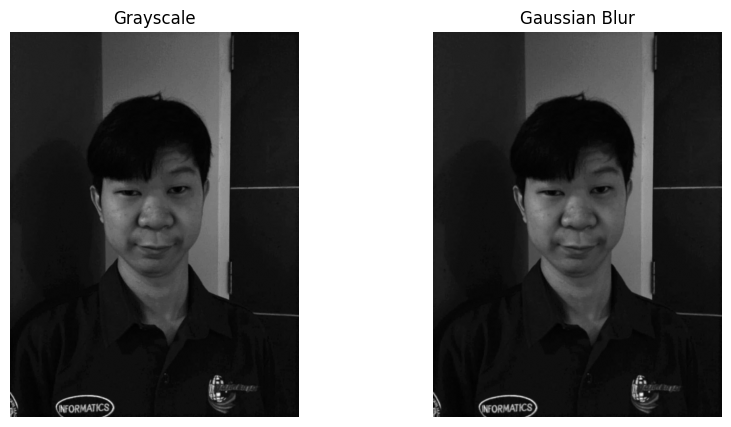

PSNR grayscale dan Gaussian Blur ( 3 x 3 ): 56.59365510057398 dB


In [ ]:
img = cv2.imread('/content/face1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def GaussPSNR(img, kernel):
  blur = cv2.GaussianBlur(gray, (kernel, kernel), 0)

  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.title("Grayscale")
  plt.imshow(gray, cmap='gray')
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.title("Gaussian Blur")
  plt.imshow(blur, cmap='gray')
  plt.axis("off")

  plt.show()

  psnr_value = cv2.PSNR(gray, blur)
  print("PSNR grayscale dan Gaussian Blur (", kernel ,"x", kernel ,"):", psnr_value, "dB")

kernel = 3
GaussPSNR(gray, kernel)

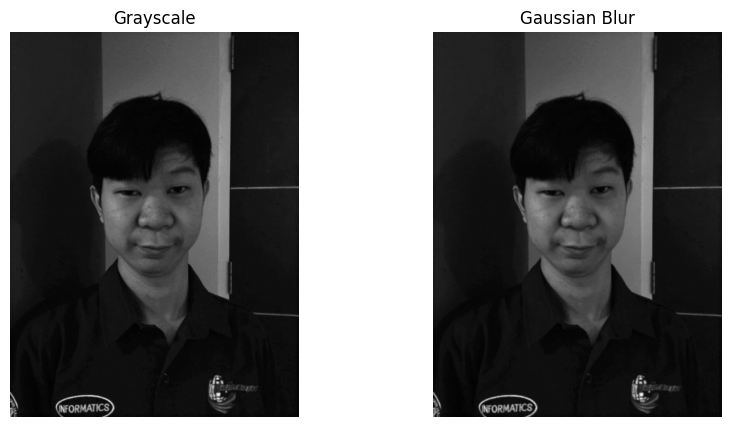

PSNR grayscale dan Gaussian Blur ( 5 x 5 ): 53.03812015865704 dB


In [ ]:
kernel = 5
GaussPSNR(gray, kernel)

- Rekomendasi metode peningkatan kualitas wajah untuk sistem pengenalan wajah real-time<br>
Jawab:<br>
  - Gamma Correction karena bagus untuk memperbaiki pencahayaan yang terlalu gelap atau terlalu terang dengan penyesuaian non-linear.
  - Bilateral Filtering: mempertahankan tepi wajah sambil mereduksi noise, lebih baik daripada high-pass murni.
